In [ ]:
# install the kaggle library
!pip install kaggle

#make a directory
! mkdir ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#copy "kaggle.json" into new directory
#have to upload kaggle.json file every time the run time is out (which contains your kaggle key to run this)
! cp kaggle.json ~/.kaggle/

In [ ]:
# allocate the required permission
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download dataset
! kaggle competitions download mammography-image-patch-classification-2023

100% 460M/460M [00:27<00:00, 18.3MB/s]
100% 460M/460M [00:27<00:00, 17.3MB/s]


In [ ]:
! unzip mammography-image-patch-classification-2023.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_imgs/P000435.png  
  inflating: train_imgs/P000436.png  
  inflating: train_imgs/P000437.png  
  inflating: train_imgs/P000438.png  
  inflating: train_imgs/P000439.png  
  inflating: train_imgs/P000440.png  
  inflating: train_imgs/P000441.png  
  inflating: train_imgs/P000442.png  
  inflating: train_imgs/P000443.png  
  inflating: train_imgs/P000444.png  
  inflating: train_imgs/P000445.png  
  inflating: train_imgs/P000446.png  
  inflating: train_imgs/P000447.png  
  inflating: train_imgs/P000448.png  
  inflating: train_imgs/P000449.png  
  inflating: train_imgs/P000450.png  
  inflating: train_imgs/P000451.png  
  inflating: train_imgs/P000452.png  
  inflating: train_imgs/P000453.png  
  inflating: train_imgs/P000454.png  
  inflating: train_imgs/P000455.png  
  inflating: train_imgs/P000456.png  
  inflating: train_imgs/P000457.png  
  inflating: train_imgs/P000458.png  
  inflating: train_imgs/P000459.png  

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
import os

In [ ]:
#load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#read annotation file
train_annotation = pd.read_csv('train.csv')

In [ ]:
from skimage import io, img_as_float32
import numpy as np
import torch

class ToTensor3D(object):
    """Convert ndarrays in sample to Tensors."""
    def __call__(self, image):
        image = img_as_float32(image)
        return torch.from_numpy(image.copy())

In [ ]:
img = io.imread('/content/train_imgs/P000001.png')

In [ ]:
img

array([[35237, 35200, 35113, ...,  4903,  4700,  5032],
       [35287, 35434, 35471, ...,  5173,  4971,  5049],
       [35832, 35460, 35653, ...,  5327,  5225,  4821],
       ...,
       [43721, 43312, 43494, ..., 35743, 34915, 34285],
       [44622, 44601, 44803, ..., 35801, 35599, 34201],
       [44508, 44414, 44765, ..., 35187, 34971, 34081]], dtype=uint16)

In [ ]:
transform = ToTensor3D()
img_t = transform(img)
img_t

tensor([[0.5377, 0.5371, 0.5358,  ..., 0.0748, 0.0717, 0.0768],
        [0.5384, 0.5407, 0.5413,  ..., 0.0789, 0.0759, 0.0770],
        [0.5468, 0.5411, 0.5440,  ..., 0.0813, 0.0797, 0.0736],
        ...,
        [0.6671, 0.6609, 0.6637,  ..., 0.5454, 0.5328, 0.5232],
        [0.6809, 0.6806, 0.6836,  ..., 0.5463, 0.5432, 0.5219],
        [0.6791, 0.6777, 0.6831,  ..., 0.5369, 0.5336, 0.5200]])

In [ ]:
import shutil
import os

In [ ]:
!mkdir train_imgs_converted

In [ ]:
path = "./train_imgs"
output_folder = "./train_imgs_converted"

for image_name in os.listdir(path):
    image_path = os.path.join(path, image_name)
    image = io.imread(image_path)
    transform = ToTensor3D()
    image_t = transform(image)
    output_path = os.path.join(output_folder, image_name)
    io.imsave(output_path, image_t)

Streaming output truncated to the last 5000 lines.
<ipython-input-14-4d231cacf9ca>:10: UserWarning: ./train_imgs_converted/P001202.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-14-4d231cacf9ca>:10: UserWarning: ./train_imgs_converted/P002627.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-14-4d231cacf9ca>:10: UserWarning: ./train_imgs_converted/P004799.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-14-4d231cacf9ca>:10: UserWarning: ./train_imgs_converted/P003970.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-14-4d231cacf9ca>:10: UserWarning: ./train_imgs_converted/P001289.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-14-4d231cacf9ca>:10: UserWarning: ./train_imgs_converted/P005122.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-14-4d231cacf9ca>:10: UserWarning: ./train_imgs_converted/P000015.png is a low cont

In [ ]:
#this folder contain converted images with pre-trained models
!mkdir train_imgs_converted_pretrained

In [ ]:
class ToTensor3D_pre(object):
    """Convert ndarrays in sample to Tensors."""
    def __call__(self, image):
        image = img_as_float32(image)
        new_shape = (3,) + image.shape
        image = np.broadcast_to(image, new_shape)
        return torch.from_numpy(image.copy())

In [ ]:
path = "./train_imgs"
output_folder = "./train_imgs_converted_pretrained"

for image_name in os.listdir(path):
    image_path = os.path.join(path, image_name)
    image = io.imread(image_path)
    transform = ToTensor3D_pre()
    image_t = transform(image)
    image_t = np.transpose(image_t, (1,2,0))
    output_path = os.path.join(output_folder, image_name)
    io.imsave(output_path, image_t)

Streaming output truncated to the last 5000 lines.
<ipython-input-17-78fae5bf8087>:11: UserWarning: ./train_imgs_converted_pretrained/P001202.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-17-78fae5bf8087>:11: UserWarning: ./train_imgs_converted_pretrained/P002627.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-17-78fae5bf8087>:11: UserWarning: ./train_imgs_converted_pretrained/P004799.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-17-78fae5bf8087>:11: UserWarning: ./train_imgs_converted_pretrained/P003970.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-17-78fae5bf8087>:11: UserWarning: ./train_imgs_converted_pretrained/P001289.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-17-78fae5bf8087>:11: UserWarning: ./train_imgs_converted_pretrained/P005122.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-17-78fae5bf8087>

In [ ]:
#this folder contains test images converted for image reading (transfer learning)
!mkdir test_imgs_converted_pretrained

In [ ]:
path = "./test_imgs"
output_folder = "./test_imgs_converted_pretrained"

for image_name in os.listdir(path):
    image_path = os.path.join(path, image_name)
    image = io.imread(image_path)
    transform = ToTensor3D_pre()
    image_t = transform(image)
    image_t = np.transpose(image_t, (1,2,0))
    output_path = os.path.join(output_folder, image_name)
    io.imsave(output_path, image_t)

<ipython-input-19-11861f2e3824>:11: UserWarning: ./test_imgs_converted_pretrained/P101077.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-19-11861f2e3824>:11: UserWarning: ./test_imgs_converted_pretrained/P100170.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-19-11861f2e3824>:11: UserWarning: ./test_imgs_converted_pretrained/P100692.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-19-11861f2e3824>:11: UserWarning: ./test_imgs_converted_pretrained/P100818.png is a low contrast image
  io.imsave(output_path, image_t)
<ipython-input-19-11861f2e3824>:11: UserWarning: ./test_imgs_converted_pretrained/P100685.png is a low contrast image
  io.imsave(output_path, image_t)


In [ ]:
#this folder contain orginal image
!mkdir dataset

In [ ]:
source_folder = './train_imgs'
destination_folder = './dataset'

for index, row in train_annotation.iterrows():
  image_file = row['img_name']
  label = row['label']
  if not os.path.exists(os.path.join(destination_folder, label)):
    os.makedirs(os.path.join(destination_folder, label))
  shutil.copy2(os.path.join(source_folder, image_file), os.path.join(destination_folder, label, image_file))

In [ ]:
#this folder contain converted images using suggested image reading code
!mkdir dataset_conv

In [ ]:
#Here put the images in each subset containing matched label
source_folder = './train_imgs_converted'
destination_folder = './dataset_conv'

for index, row in train_annotation.iterrows():
  image_file = row['img_name']
  label = row['label']
  if not os.path.exists(os.path.join(destination_folder, label)):
    os.makedirs(os.path.join(destination_folder, label))
  shutil.copy2(os.path.join(source_folder, image_file), os.path.join(destination_folder, label, image_file))

In [ ]:
#this folder contains converted images using suggested image reading code for transfer learning
!mkdir dataset_conv_pretrained

In [ ]:
#Here put the images in each subset containing matched label for transfer learning
source_folder = './train_imgs_converted'
destination_folder = './dataset_conv_pretrained'

for index, row in train_annotation.iterrows():
  image_file = row['img_name']
  label = row['label']
  if not os.path.exists(os.path.join(destination_folder, label)):
    os.makedirs(os.path.join(destination_folder, label))
  shutil.copy2(os.path.join(source_folder, image_file), os.path.join(destination_folder, label, image_file))

In [ ]:
!pip install opencv-python
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Siddhartha's CLAHE addition
import cv2
import PIL
def CLAHE(image: PIL.Image.Image) -> PIL.Image.Image:
    to_tensor = transforms.Compose([transforms.PILToTensor()])

    image_tensor = to_tensor(image)

    R = image_tensor[0].numpy()
    G = image_tensor[1].numpy()
    B = image_tensor[2].numpy()

    output1_R = cv2.equalizeHist(R)
    output1_G = cv2.equalizeHist(G)
    output1_B = cv2.equalizeHist(B)

    equ = np.stack((output1_R, output1_B, output1_G))

    return PIL.Image.fromarray(np.ascontiguousarray(equ.transpose(1, 2, 0)), "RGB")

In [ ]:
#image_datasets = torchvision.datasets.ImageFolder('./dataset_conv', transforms.ToTensor())

In [ ]:
#use this on converted dataset
# In order to append the CLAHE to the transform you can use the below line, I also include other
# data augmentation approaches that have been used in previous studies

#image_datasets = torchvision.datasets.ImageFolder('./dataset_conv', transform = transforms.Compose([
#transforms.RandomRotation(90),
#transforms.RandomRotation(180),
#transforms.RandomRotation(270),
#transforms.RandomResizedCrop(168),
#transforms.RandomResizedCrop(200),
#transforms.RandomHorizontalFlip(),
#transforms.RandomVerticalFlip(),
#transforms.Lambda(CLAHE),
#transforms.ToTensor()
#]))

In [ ]:
#use this on converted pre-trained dataset (if using transfer learning)
# In order to append the CLAHE to the transform you can use the below line, I also include other
# data augmentation approaches that have been used in previous studies

image_datasets = torchvision.datasets.ImageFolder('./dataset_conv_pretrained', transform = transforms.Compose([
transforms.RandomRotation(90),
transforms.RandomRotation(180),
transforms.RandomRotation(270),
transforms.RandomResizedCrop(168),
transforms.RandomResizedCrop(200),
transforms.RandomHorizontalFlip(),
transforms.RandomVerticalFlip(),
transforms.Lambda(CLAHE),
transforms.ToTensor()
]))

In [ ]:
#create a folder for converted test set
!mkdir test_imgs_dataset

!mv test_imgs_converted_pretrained/ '/content/test_imgs_dataset'

#test datasets for converted images
test_datasets = torchvision.datasets.ImageFolder('./test_imgs_dataset', transform = transforms.Compose([
transforms.RandomResizedCrop(168),
transforms.RandomResizedCrop(200),
transforms.Lambda(CLAHE),
transforms.ToTensor()
]))

In [ ]:
# Split the training dataset into training and validation sets
train_size = int(0.8 * len(image_datasets))
val_size = len(image_datasets) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(image_datasets, [train_size, val_size])

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers = 2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers = 2)

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
#get one batch of dataset
data, targets = next(iter(train_loader))

In [ ]:
type(data), data.shape

(torch.Tensor, torch.Size([64, 3, 200, 200]))

In [ ]:
#reshape the tensor to channel-last format
data_last = data.transpose(1,3).contiguous()
data_last = data_last.transpose(1,2).contiguous()

In [ ]:
type(data_last), data_last.shape

(torch.Tensor, torch.Size([64, 200, 200, 3]))

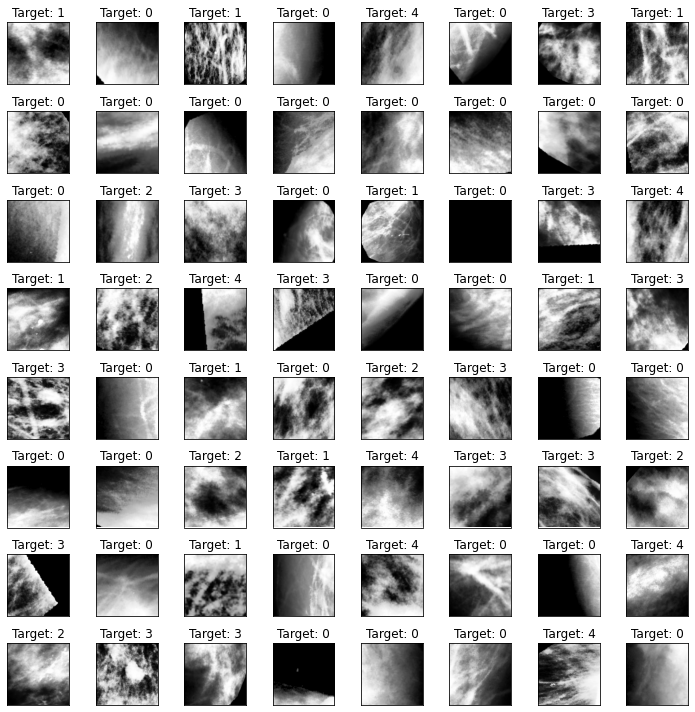

In [ ]:
# Display the samples
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(data_last[i])
    ax.set_title(f'Target: {targets[i]}')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

3. VGGNet Models

VGGNet with transfer learning

In [ ]:
def model_eval(model, loader_, criterion):
    # Test the model
    model.eval()
    eval_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loader_:
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            eval_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    eval_loss /= len(loader_)
    eval_acc = correct/len(loader_.dataset)
    return eval_loss, eval_acc

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
#load a pretrain model
model = models.vgg16(pretrained=True)
num_fltrs = model.classifier[-1].in_features

#vggnet final fully connected layer using number of target output
num_classes = 5
model.fc = torch.nn.Linear(num_fltrs, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #momentum=0.9

In [ ]:
# Train the model with lr = 0.001
model = model.to(device)
best_acc = 0
since = time.time()
for epoch in range(10):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'VGGNet16pretrained.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

Train Epoch: 0	Loss: 2.633131	Acc: 0.406	Val - Loss:1.363039	Acc:0.458
Train Epoch: 1	Loss: 1.376427	Acc: 0.456	Val - Loss:1.326264	Acc:0.460
Train Epoch: 2	Loss: 1.362662	Acc: 0.465	Val - Loss:1.328066	Acc:0.467
Train Epoch: 3	Loss: 1.322128	Acc: 0.470	Val - Loss:1.283220	Acc:0.473
Train Epoch: 4	Loss: 1.307032	Acc: 0.462	Val - Loss:1.407378	Acc:0.440
Train Epoch: 5	Loss: 1.327574	Acc: 0.467	Val - Loss:1.407413	Acc:0.450
Train Epoch: 6	Loss: 1.343983	Acc: 0.459	Val - Loss:1.348284	Acc:0.462
Train Epoch: 7	Loss: 1.310753	Acc: 0.467	Val - Loss:1.329985	Acc:0.450
Train Epoch: 8	Loss: 1.309972	Acc: 0.461	Val - Loss:1.309576	Acc:0.467
Train Epoch: 9	Loss: 1.308532	Acc: 0.463	Val - Loss:1.350133	Acc:0.444
Training complete in 9m 59s
Best val Acc: 0.472861


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1)

In [ ]:
#train the model with lr = 0.001, LR scheduled 0.1 for every 10 epochs, total epochs = 50
model = model.to(device)
best_acc = 0
since = time.time()
for epoch in range(21):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    exp_lr_scheduler.step()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'Resnet18_pretrained.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

Train Epoch: 0	Loss: 1.297918	Acc: 0.470	Val - Loss:1.288671	Acc:0.460
Train Epoch: 1	Loss: 1.272878	Acc: 0.470	Val - Loss:1.289452	Acc:0.467
Train Epoch: 2	Loss: 1.271117	Acc: 0.476	Val - Loss:1.272729	Acc:0.466
Train Epoch: 3	Loss: 1.272023	Acc: 0.468	Val - Loss:1.282169	Acc:0.477
Train Epoch: 4	Loss: 1.266815	Acc: 0.471	Val - Loss:1.280518	Acc:0.483
Train Epoch: 5	Loss: 1.267851	Acc: 0.464	Val - Loss:1.258774	Acc:0.479
Train Epoch: 6	Loss: 1.266331	Acc: 0.472	Val - Loss:1.246288	Acc:0.484
Train Epoch: 7	Loss: 1.267535	Acc: 0.469	Val - Loss:1.250234	Acc:0.459
Train Epoch: 8	Loss: 1.264817	Acc: 0.472	Val - Loss:1.252329	Acc:0.481
Train Epoch: 9	Loss: 1.253359	Acc: 0.480	Val - Loss:1.261533	Acc:0.473
Train Epoch: 10	Loss: 1.250822	Acc: 0.478	Val - Loss:1.249191	Acc:0.475
Train Epoch: 11	Loss: 1.250928	Acc: 0.493	Val - Loss:1.265334	Acc:0.471
Train Epoch: 12	Loss: 1.249563	Acc: 0.482	Val - Loss:1.244694	Acc:0.482
Train Epoch: 13	Loss: 1.253419	Acc: 0.479	Val - Loss:1.260467	Acc:0.461
Tr

In [ ]:
#vgg19

#load a pretrain model
model = models.vgg19(pretrained=True)
num_fltrs = model.classifier[-1].in_features

#vggnet final fully connected layer using number of target output
num_classes = 5
model.fc = torch.nn.Linear(num_fltrs, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1)




In [ ]:
# Train the model with lr = 0.001
model = model.to(device)
best_acc = 0
since = time.time()
for epoch in range(21):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'VGGNet19pretrained.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

Train Epoch: 0	Loss: 1.796639	Acc: 0.406	Val - Loss:1.377930	Acc:0.468
Train Epoch: 1	Loss: 1.349106	Acc: 0.457	Val - Loss:1.282868	Acc:0.496
Train Epoch: 2	Loss: 1.320201	Acc: 0.467	Val - Loss:1.299832	Acc:0.489
Train Epoch: 3	Loss: 1.286656	Acc: 0.476	Val - Loss:1.271922	Acc:0.493
Train Epoch: 4	Loss: 1.275426	Acc: 0.479	Val - Loss:1.260407	Acc:0.480
Train Epoch: 5	Loss: 1.273596	Acc: 0.473	Val - Loss:1.249576	Acc:0.488
Train Epoch: 6	Loss: 1.252284	Acc: 0.488	Val - Loss:1.253527	Acc:0.500
Train Epoch: 7	Loss: 1.230428	Acc: 0.498	Val - Loss:1.205997	Acc:0.496
Train Epoch: 8	Loss: 1.239295	Acc: 0.499	Val - Loss:1.216693	Acc:0.514
Train Epoch: 9	Loss: 1.219154	Acc: 0.499	Val - Loss:1.222945	Acc:0.504
Train Epoch: 10	Loss: 1.227052	Acc: 0.506	Val - Loss:1.226946	Acc:0.485
Train Epoch: 11	Loss: 1.195462	Acc: 0.516	Val - Loss:1.198781	Acc:0.532
Train Epoch: 12	Loss: 1.199044	Acc: 0.513	Val - Loss:1.218632	Acc:0.503
Train Epoch: 13	Loss: 1.195690	Acc: 0.513	Val - Loss:1.183405	Acc:0.534
Tr

In [ ]:
model = models.vgg19_bn(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

num_fltrs = model.classifier[-1].in_features
num_classes = 5
model.classifier[-1] = nn.Linear(num_fltrs, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1)



/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
#train the model with lr = 0.001, LR scheduled 0.1 for every 10 epochs, total epochs = 50
model = model.to(device)
best_acc = 0
since = time.time()
for epoch in range(21):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    exp_lr_scheduler.step()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'Resnet19_pretrained.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

Train Epoch: 0	Loss: 1.380054	Acc: 0.443	Val - Loss:1.308422	Acc:0.476
Train Epoch: 1	Loss: 1.313907	Acc: 0.466	Val - Loss:1.285563	Acc:0.477
Train Epoch: 2	Loss: 1.279659	Acc: 0.486	Val - Loss:1.262408	Acc:0.494
Train Epoch: 3	Loss: 1.290620	Acc: 0.479	Val - Loss:1.258872	Acc:0.494
Train Epoch: 4	Loss: 1.312253	Acc: 0.471	Val - Loss:1.274511	Acc:0.494
Train Epoch: 5	Loss: 1.281519	Acc: 0.484	Val - Loss:1.235884	Acc:0.482
Train Epoch: 6	Loss: 1.284534	Acc: 0.482	Val - Loss:1.251854	Acc:0.492
Train Epoch: 7	Loss: 1.276358	Acc: 0.485	Val - Loss:1.227319	Acc:0.500
Train Epoch: 8	Loss: 1.282213	Acc: 0.490	Val - Loss:1.241153	Acc:0.492
Train Epoch: 9	Loss: 1.260045	Acc: 0.502	Val - Loss:1.248700	Acc:0.511
Train Epoch: 10	Loss: 1.263900	Acc: 0.494	Val - Loss:1.233107	Acc:0.499
Train Epoch: 11	Loss: 1.266468	Acc: 0.494	Val - Loss:1.225944	Acc:0.502
Train Epoch: 12	Loss: 1.268978	Acc: 0.491	Val - Loss:1.222743	Acc:0.509
Train Epoch: 13	Loss: 1.264558	Acc: 0.492	Val - Loss:1.235396	Acc:0.507
Tr

In [ ]:
#load a pretrain model
model = models.vgg19_bn(pretrained=True)
num_fltrs = model.classifier[-1].in_features

#vggnet final fully connected layer using number of target output
num_classes = 5
model.fc = torch.nn.Linear(num_fltrs, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)




In [ ]:
# Train the model with lr = 0.001
model = model.to(device)
best_acc = 0
since = time.time()
for epoch in range(20):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'VGGNet19pretrained.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

Train Epoch: 0	Loss: 4.971731	Acc: 0.247	Val - Loss:1.892265	Acc:0.461
Train Epoch: 1	Loss: 1.697852	Acc: 0.436	Val - Loss:1.456209	Acc:0.457
Train Epoch: 2	Loss: 1.510535	Acc: 0.445	Val - Loss:1.358778	Acc:0.474
Train Epoch: 3	Loss: 1.445218	Acc: 0.456	Val - Loss:1.344700	Acc:0.466
Train Epoch: 4	Loss: 1.403023	Acc: 0.463	Val - Loss:1.314624	Acc:0.476
Train Epoch: 5	Loss: 1.385284	Acc: 0.469	Val - Loss:1.280583	Acc:0.483
Train Epoch: 6	Loss: 1.366170	Acc: 0.466	Val - Loss:1.271950	Acc:0.487
Train Epoch: 7	Loss: 1.341639	Acc: 0.478	Val - Loss:1.254842	Acc:0.494
Train Epoch: 8	Loss: 1.325210	Acc: 0.476	Val - Loss:1.256601	Acc:0.494
Train Epoch: 9	Loss: 1.319980	Acc: 0.477	Val - Loss:1.239558	Acc:0.496
Train Epoch: 10	Loss: 1.300640	Acc: 0.485	Val - Loss:1.205685	Acc:0.533
Train Epoch: 11	Loss: 1.300145	Acc: 0.487	Val - Loss:1.219197	Acc:0.512
Train Epoch: 12	Loss: 1.286803	Acc: 0.495	Val - Loss:1.221924	Acc:0.507
Train Epoch: 13	Loss: 1.287341	Acc: 0.487	Val - Loss:1.223448	Acc:0.514
Tr

In [ ]:
#fine tune whole network, including weights
model = models.vgg19_bn(pretrained=True)
for param in model.parameters():
    param.requires_grad = True

num_fltrs = model.classifier[-1].in_features
num_classes = 5
model.classifier[-1] = nn.Linear(num_fltrs, num_classes)
model.classifier[-1].requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
# Train the model with lr = 0.001
model = model.to(device)
best_acc = 0
since = time.time()
for epoch in range(56):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'VGGNet19BNpretrainedW.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

Train Epoch: 0	Loss: 1.352744	Acc: 0.463	Val - Loss:1.263712	Acc:0.493
Train Epoch: 1	Loss: 1.264604	Acc: 0.483	Val - Loss:1.242893	Acc:0.494
Train Epoch: 2	Loss: 1.233708	Acc: 0.500	Val - Loss:1.226191	Acc:0.535
Train Epoch: 3	Loss: 1.201141	Acc: 0.518	Val - Loss:1.166737	Acc:0.521
Train Epoch: 4	Loss: 1.183562	Acc: 0.523	Val - Loss:1.155676	Acc:0.527
Train Epoch: 5	Loss: 1.164117	Acc: 0.521	Val - Loss:1.173809	Acc:0.519
Train Epoch: 6	Loss: 1.141877	Acc: 0.538	Val - Loss:1.138482	Acc:0.546
Train Epoch: 7	Loss: 1.132899	Acc: 0.552	Val - Loss:1.123627	Acc:0.541
Train Epoch: 8	Loss: 1.125089	Acc: 0.549	Val - Loss:1.115576	Acc:0.554
Train Epoch: 9	Loss: 1.097262	Acc: 0.566	Val - Loss:1.110330	Acc:0.547
Train Epoch: 10	Loss: 1.091916	Acc: 0.566	Val - Loss:1.085944	Acc:0.574
Train Epoch: 11	Loss: 1.086468	Acc: 0.574	Val - Loss:1.093196	Acc:0.560
Train Epoch: 12	Loss: 1.074910	Acc: 0.576	Val - Loss:1.075996	Acc:0.582
Train Epoch: 13	Loss: 1.075457	Acc: 0.576	Val - Loss:1.057819	Acc:0.589
Tr

In [ ]:
model.load_state_dict(torch.load('VGGNet19BNpretrainedW.pt'))
model.eval()
predicted_labels = []
file_names = []
label_names = ['background', 'calc_ben', 'calc_mal', 'mass_ben', 'mass_mal']
test_loader = torch.utils.data.DataLoader(test_datasets, batch_size=64, shuffle=False, num_workers = 3)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
with torch.no_grad():
  for data, pred in test_loader:
    data = data.to(device)
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)
    predicted_label = [label_names[pred[j]] for j in range(len(pred))]
    predicted_labels += predicted_label
    file_names += [os.path.basename(test_datasets.imgs[i][0]) for i in range(len(pred))]

In [ ]:
test_label = pd.DataFrame(predicted_labels, columns = ['label'])
test_annotation = pd.read_csv('test.csv')
test_submission = pd.concat([test_annotation, test_label], axis = 1)
test_submission = test_submission.drop('img_name', axis = 1)
test_submission

,id,label
0,P100000,background
1,P100001,background
2,P100002,background
3,P100003,background
4,P100004,mass_ben
...,...,...
1230,P101230,background
1231,P101231,calc_ben
1232,P101232,background
1233,P101233,background


In [ ]:
from google.colab import drive, files
test_submission.to_csv('test_submission3.csv', index = False)

In [ ]:
#freeze pretrained weights and only train final network layer
model = models.vgg19_bn(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

num_fltrs = model.classifier[-1].in_features
num_classes = 5
model.classifier[-1] = nn.Linear(num_fltrs, num_classes)
model.classifier[-1].requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Train the model with lr = 0.001
model = model.to(device)
best_acc = 0
since = time.time()
for epoch in range(21):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'VGGNet19BNpretrainedW2.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

Train Epoch: 0	Loss: 1.375309	Acc: 0.448	Val - Loss:1.285461	Acc:0.473
Train Epoch: 1	Loss: 1.303465	Acc: 0.474	Val - Loss:1.256524	Acc:0.494
Train Epoch: 2	Loss: 1.298481	Acc: 0.479	Val - Loss:1.272812	Acc:0.505
Train Epoch: 3	Loss: 1.305867	Acc: 0.474	Val - Loss:1.272138	Acc:0.490
Train Epoch: 4	Loss: 1.287325	Acc: 0.482	Val - Loss:1.259391	Acc:0.505
Train Epoch: 5	Loss: 1.282297	Acc: 0.493	Val - Loss:1.250293	Acc:0.502
Train Epoch: 6	Loss: 1.291345	Acc: 0.484	Val - Loss:1.230782	Acc:0.501
Train Epoch: 7	Loss: 1.286729	Acc: 0.485	Val - Loss:1.256918	Acc:0.488
Train Epoch: 8	Loss: 1.278307	Acc: 0.489	Val - Loss:1.240473	Acc:0.501


KeyboardInterrupt: ignored

In [ ]:
model.load_state_dict(torch.load('VGGNet19pretrained.pt'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
model.load_state_dict(torch.load('VGGNet19pretrained.pt'))
model.eval()
predicted_labels = []
file_names = []
label_names = ['background', 'calc_ben', 'calc_mal', 'mass_ben', 'mass_mal']

In [ ]:
with torch.no_grad():
    data = data.to(device)
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)
    predicted_labels = [label_names[pred[j]] for j in range(len(pred))]
    file_names += [os.path.basename(test_datasets.imgs[i][0]) for i in range(len(pred))]


In [ ]:
test_label = pd.DataFrame(predicted_labels, columns = ['label'])
test_annotation = pd.read_csv('test.csv')
test_submission = pd.concat([test_annotation, test_label], axis = 1)
test_submission = test_submission.drop('img_name', axis = 1)
test_submission

,id,label
0,P100000,background
1,P100001,background
2,P100002,background
3,P100003,background
4,P100004,calc_ben
...,...,...
1230,P101230,NaN
1231,P101231,NaN
1232,P101232,NaN
1233,P101233,NaN


In [ ]:
from google.colab import drive, files
test_submission.to_csv('test_submission1.csv', index = False)

In [ ]:
for batch_idx, (data, pred) in enumerate(test_loader):
    optimizer.zero_grad()
    data = data.to(device)
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)
    predicted_label = [label_names[pred[j]] for j in range(len(pred))]
    predicted_labels += predicted_label
    file_names += [os.path.basename(test_datasets.imgs[i][0]) for i in range(len(pred))]

OutOfMemoryError: ignored

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.1)

In [ ]:
#Train the model with lr = 0.001
model = model.to(device)
best_acc = 0
since = time.time()
for epoch in range(50):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'VGGNet19_BNpretrained.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

Train Epoch: 0	Loss: 2.340881	Acc: 0.399	Val - Loss:1.308514	Acc:0.479
Train Epoch: 1	Loss: 1.298243	Acc: 0.484	Val - Loss:1.271716	Acc:0.486
Train Epoch: 2	Loss: 1.278235	Acc: 0.482	Val - Loss:1.242302	Acc:0.500
Train Epoch: 3	Loss: 1.232602	Acc: 0.507	Val - Loss:1.218383	Acc:0.500
Train Epoch: 4	Loss: 1.218980	Acc: 0.510	Val - Loss:1.191920	Acc:0.516
Train Epoch: 5	Loss: 1.205272	Acc: 0.515	Val - Loss:1.185173	Acc:0.527
Train Epoch: 6	Loss: 1.178478	Acc: 0.531	Val - Loss:1.171784	Acc:0.518
Train Epoch: 7	Loss: 1.154977	Acc: 0.544	Val - Loss:1.151517	Acc:0.546
Train Epoch: 8	Loss: 1.151678	Acc: 0.537	Val - Loss:1.172939	Acc:0.543
Train Epoch: 9	Loss: 1.134226	Acc: 0.554	Val - Loss:1.106434	Acc:0.565
Train Epoch: 10	Loss: 1.132654	Acc: 0.551	Val - Loss:1.128147	Acc:0.547
Train Epoch: 11	Loss: 1.123406	Acc: 0.552	Val - Loss:1.129073	Acc:0.554
Train Epoch: 12	Loss: 1.108864	Acc: 0.562	Val - Loss:1.096547	Acc:0.557
Train Epoch: 13	Loss: 1.095343	Acc: 0.565	Val - Loss:1.107875	Acc:0.556
Tr

In [ ]:
model.load_state_dict(torch.load('VGGNet19_BNpretrained.pt'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
predicted_labels = []
file_names = []
label_names = ['background', 'calc_ben', 'calc_mal', 'mass_ben', 'mass_mal']

In [ ]:
test_loader = torch.utils.data.DataLoader(test_datasets, batch_size=64, shuffle=False, num_workers = 3)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
with torch.no_grad():
  for data, pred in test_loader:
    data = data.to(device)
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)
    predicted_label = [label_names[pred[j]] for j in range(len(pred))]
    predicted_labels += predicted_label
    file_names += [os.path.basename(test_datasets.imgs[i][0]) for i in range(len(pred))]

In [ ]:
with torch.no_grad():
    data = data.to(device)
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)
    predicted_labels = [label_names[pred[j]] for j in range(len(pred))]

In [ ]:
test_label = pd.DataFrame(predicted_labels, columns = ['label'])
test_annotation = pd.read_csv('test.csv')
test_submission = pd.concat([test_annotation, test_label], axis = 1)
test_submission = test_submission.drop('img_name', axis = 1)
test_submission

,id,label
0,P100000,background
1,P100001,calc_ben
2,P100002,background
3,P100003,mass_mal
4,P100004,background
...,...,...
1230,P101230,calc_mal
1231,P101231,background
1232,P101232,background
1233,P101233,background


In [ ]:
test_submission.isna().sum()

id          0
label    1176
dtype: int64

In [ ]:
print(len(predicted_labels))
print(len(test_annotation))

59
1235


In [ ]:
from google.colab import drive, files
test_submission.to_csv('test_submission3.csv', index = False)

In [ ]:
test_submission2.csv

NameError: ignored

In [ ]:
print(predicted_labels)

['background', 'background', 'background', 'calc_ben', 'background', 'calc_ben', 'background', 'calc_ben', 'background', 'background', 'mass_ben', 'mass_mal', 'background', 'background', 'background', 'mass_ben', 'calc_ben', 'calc_ben', 'calc_mal', 'background', 'background', 'background', 'calc_mal', 'background', 'mass_mal', 'background', 'mass_mal', 'mass_ben', 'background', 'mass_mal', 'mass_ben', 'background', 'mass_ben', 'background', 'background', 'calc_mal', 'background', 'background', 'background', 'background', 'mass_mal', 'background', 'background', 'background', 'calc_ben', 'background', 'calc_mal', 'background', 'calc_ben', 'mass_mal', 'mass_ben', 'mass_mal', 'background', 'background', 'background', 'background', 'background', 'calc_ben', 'background']


In [ ]:
for batch_idx, (data in enumerate(test_loader):

    data = data.to(device)
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)
    predicted_label = [label_names[pred[j]] for j in range(len(pred))]
    predicted_labels += predicted_label
    file_names += [os.path.basename(test_datasets.imgs[i][0]) for i in range(len(pred))]

OutOfMemoryError: ignored

In [ ]:
torch.cuda.empty_cache()

In [ ]:
test_label = pd.DataFrame(predicted_labels, columns = ['label'])
test_annotation = pd.read_csv('test.csv')
test_submission = pd.concat([test_annotation, test_label], axis = 1)
test_submission = test_submission.drop('img_name', axis = 1)

In [ ]:
test_submission

In [ ]:
from google.colab import drive, files
test_submission.to_csv('test_submission1.csv', index = False)

In [ ]:
Acc:0.546

In [ ]:
#load a pretrain model
model = models.vgg16_bn(pretrained=True)
num_fltrs = model.classifier[-1].in_features

#vggnet final fully connected layer using number of target output
num_classes = 5
model.fc = torch.nn.Linear(num_fltrs, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
# Train the model with lr = 0.001
model = model.to(device)
best_acc = 0
since = time.time()
for epoch in range(20):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'VGGNet16BNpretrained.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

Train Epoch: 0	Loss: 4.451960	Acc: 0.257	Val - Loss:1.794985	Acc:0.454
Train Epoch: 1	Loss: 1.658494	Acc: 0.438	Val - Loss:1.434918	Acc:0.441
Train Epoch: 2	Loss: 1.487674	Acc: 0.456	Val - Loss:1.365900	Acc:0.464
Train Epoch: 3	Loss: 1.458403	Acc: 0.457	Val - Loss:1.332662	Acc:0.489
Train Epoch: 4	Loss: 1.411927	Acc: 0.457	Val - Loss:1.339487	Acc:0.458
Train Epoch: 5	Loss: 1.404762	Acc: 0.454	Val - Loss:1.307744	Acc:0.470
Train Epoch: 6	Loss: 1.364725	Acc: 0.467	Val - Loss:1.312674	Acc:0.470
Train Epoch: 7	Loss: 1.337124	Acc: 0.473	Val - Loss:1.260844	Acc:0.492
Train Epoch: 8	Loss: 1.318927	Acc: 0.474	Val - Loss:1.260367	Acc:0.482
Train Epoch: 9	Loss: 1.327257	Acc: 0.481	Val - Loss:1.276520	Acc:0.485
Train Epoch: 10	Loss: 1.332679	Acc: 0.475	Val - Loss:1.260233	Acc:0.495
Train Epoch: 11	Loss: 1.299291	Acc: 0.486	Val - Loss:1.251045	Acc:0.506
Train Epoch: 12	Loss: 1.303133	Acc: 0.481	Val - Loss:1.258931	Acc:0.496
Train Epoch: 13	Loss: 1.287854	Acc: 0.486	Val - Loss:1.218695	Acc:0.508
Tr

In [ ]:
model = models.inception_v3(pretrained=True)
model.aux_logits = False
for parameter in model.parameters():
    parameter.requires_grad = False

num_classes = 5
model.fc = torch.nn.Linear(num_fltrs, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

In [ ]:
#inception v3

#load a pretrain model
model = models.inception_v3(pretrained=True)
num_fltrs = model.fc.in_features

model.Conv2d_1a_3x3.conv = nn.Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2), bias=False)
#vggnet final fully connected layer using number of target output
num_classes = 5
model.fc = torch.nn.Linear(num_fltrs, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Load a pretrain model
model = models.inception_v3(pretrained=True)
model.Conv2d_1a_3x3.conv = nn.Conv2d(3, 32, kernel_size=3, stride=2, bias=False)

num_fltrs = model.fc.in_features


# Remove the Conv2d_1a_3x3 layer
model.Conv2d_1a_3x3 = nn.Identity()

# VGGNet final fully connected layer using number of target output
num_classes = 5
model.fc = torch.nn.Linear(num_fltrs, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Train the model with lr = 0.001
model = model.to(device)
best_acc = 0
since = time.time()
for epoch in range(10):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'inception_v3_pretrained.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

RuntimeError: ignored

In [ ]:
# Define the transforms for training and validation datasets
train_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
val_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Use the new transforms for loading the datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transforms)

# Modify the model architecture
model = models.inception_v3(pretrained=True)
num_fltrs = model.fc.in_features
num_classes = 5
model.fc = nn.Linear(num_fltrs, num_classes)

# Define the optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
best_acc = 0
since = time.time()
for epoch in range(10):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'inception_v3_pretrained.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

NameError: ignored

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.1)

In [ ]:
#train the model with lr = 0.001, LR scheduled 0.1 for every 10 epochs, total epochs = 50
model = model.to(device)
best_acc = 0
since = time.time()
for epoch in range(50):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    exp_lr_scheduler.step()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'Resnet18_pretrained.pt')
time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

In [ ]:
inception b3 /assemble
combined resnet/ vgg50
new models for breast cancer detection
different tranfer learning
class inbalance
weights- learn with that

SyntaxError: ignored

In [ ]:
#Faster R for Resnet50
from torchvision.models import resnet50

# Define the ResNet network
resnet = resnet50(pretrained=True)
backbone = nn.Sequential(*list(resnet.children())[:-2])

# Define the Region Proposal Network (RPN)
rpn = nn.Sequential(
    nn.Conv2d(2048, 256, 3, 1, 1),
    nn.ReLU(),
    nn.Conv2d(256, 256, 3, 1, 1),
    nn.ReLU(),
    nn.Conv2d(256, 256, 3, 1, 1),
    nn.ReLU(),
    nn.Conv2d(256, 256, 3, 1, 1),
    nn.ReLU(),
    nn.Conv2d(256, 9*4, 1, 1, 0)
)

# Define the Faster R-CNN model
roi_pooler = MultiScaleRoIAlign(
    featmap_names=['0'],
    output_size=7,
    sampling_ratio=2)
head = FastRCNNPredictor(2048, 2)
model = nn.Sequential(
    backbone,
    rpn,
    roi_pooler,
    head
)

# Define the loss function and optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)
criterion = nn.CrossEntropyLoss()

# Train the model
for epoch in range(30):
    for images, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{30}, Loss: {loss.item():.4f}')

Non-running code

In [ ]:
'''VGG11/13/16/19 in Pytorch.'''
import torch
import torch.nn as nn


cfg = {
    'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}


class VGG(nn.Module):
    def __init__(self, vgg_name):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg[vgg_name])
        self.classifier = nn.Linear(512, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           nn.BatchNorm2d(x),
                           nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)


def test():
    net = VGG('VGG11')
    x = torch.randn(2,3,32,32)
    y = net(x)
    print(y.size())

# test()

In [ ]:
model = VGG('VGG16')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

In [ ]:
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# Train the model
model = model.to(device)
best_acc = 0
for epoch in range(10):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_loader)
    train_acc = correct/len(train_loader.dataset)
    val_loss, val_acc = model_eval(model, val_loader, criterion)
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    train_loss.append(train_loss)
    train_acc.append(train_acc)
    val_loss.append(val_loss)
    val_acc.append(val_acc)
    if val_acc > best_acc:
        torch.save(model.state_dict(), 'VGGNet16.pt')

RuntimeError: ignored

In [ ]:
import os
import argparse
import torch.backends.cudnn as cudnn

In [ ]:
parser = argparse.ArgumentParser(description='PyTorch CIFAR10 Training')
parser.add_argument('--lr', default=0.1, type=float, help='learning rate')
parser.add_argument('--resume', '-r', action='store_true',
                    help='resume from checkpoint')
args = parser.parse_args(args=[])

device = 'cuda' if torch.cuda.is_available() else 'cpu'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch


In [ ]:
net = VGG('VGG16')
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

if args.resume:
    # Load checkpoint.
    print('==> Resuming from checkpoint..')
    assert os.path.isdir('checkpoint'), 'Error: no checkpoint directory found!'
    checkpoint = torch.load('./checkpoint/ckpt.pth')
    net.load_state_dict(checkpoint['net'])
    best_acc = checkpoint['acc']
    start_epoch = checkpoint['epoch']

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

In [ ]:
# Training

train_losses = []
train_accs = []
val_losses = []
val_accs = []

def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    train_loss /= len(train_loader)
    train_acc = correct/ len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f} ")

        #progress_bar(batch_idx, len(trainloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                     #% (train_loss/(batch_idx+1), 100.*correct/total, correct, total))
def test(epoch):
    global best_acc
    net.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(val_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    val_loss /=len(val_loader) #try valloader instead/ val_set
    correct /= len(val_dataset)
    val_losses.append(val_loss)
    val_accs.append(correct)
    print(f"Valdation Loss: {val_loss:.4f}, Validation Accuracy: {correct:.4f} ")
            #progress_bar(batch_idx, len(testloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                         #% (test_loss/(batch_idx+1), 100.*correct/total, correct, total))

    # Save checkpoint.
    acc = 100.*correct/total
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': net.state_dict(),
            'acc': acc,
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, './checkpoint/ckpt.pth')
        best_acc = acc


In [ ]:
for epoch in range(10):
    train(epoch)
    test(epoch)
    scheduler.step()